In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## Drop unneeccessary columns
df.drop(columns=['Unnamed: 0', 'year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

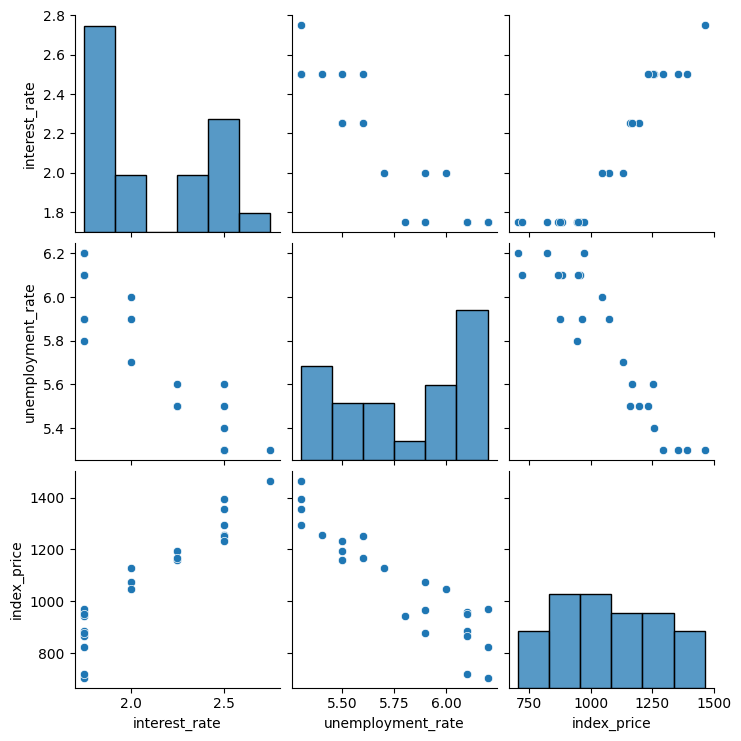

In [6]:
## We should visualize data to understand the relationship between the features and the target variable
import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

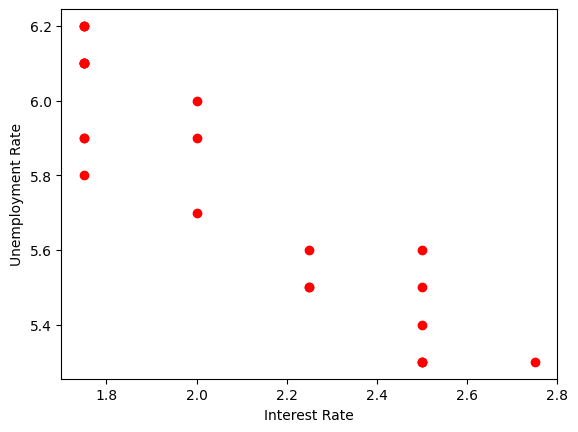

In [10]:
## Visaalize the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [15]:
## Get Dependent and Independent features
X=df.iloc[:, :-1]  # All columns except the last one
y=df.iloc[:, -1]   # Last column
print(X)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [16]:
#n test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

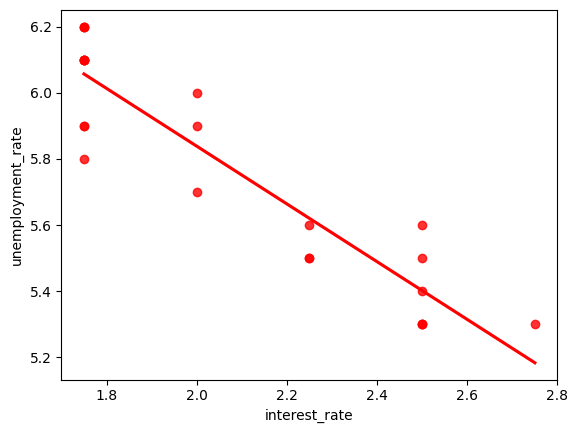

In [22]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df, ci=None, color='red')


In [23]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Cross val score is used to evaluate the performance of the model
from sklearn.model_selection import cross_val_score
validation_scores = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
## cv is the number of folds in cross-validation
# so basically we are splitting the data into 5 parts and training the model on 4 parts and testing on 1 part
# and then we repeat this process 5 times and take the average of the scores

In [28]:
validation_scores

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [29]:
np.mean(validation_scores)

-5649.115244350759

In [30]:
y_pred= regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
#Adjested R^2 Score
n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of features in the test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score: {adjusted_r2}')

Mean Squared Error: 5793.762887712579
R^2 Score: 0.8278978091457142
Adjusted R^2 Score: 0.713163015242857


## Assumptions

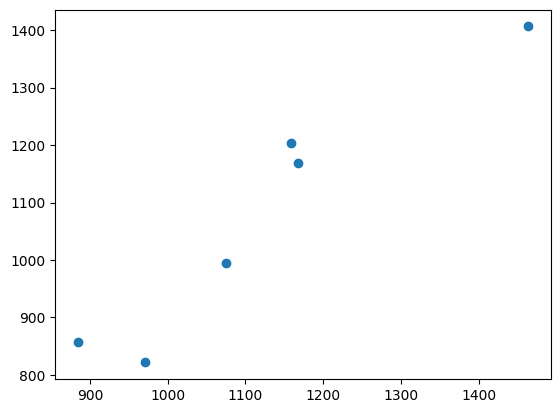

In [33]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals= y_test - y_pred
print(residuals)
#residuals are the difference between the actual values and the predicted values
#So the plot of residuals should be randomly distributed around 0

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


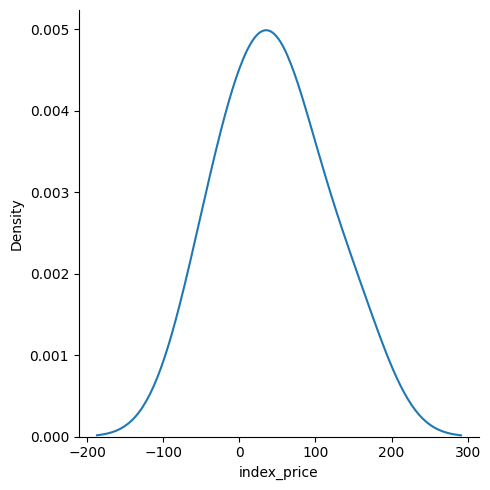

In [ ]:
sns.displot(residuals, kind='kde')
# This plot should be normally distributed around 0
# This plot tells us that the residuals are normally distributed, which is a good sign for our model
# displot is used to plot the distribution of the residuals

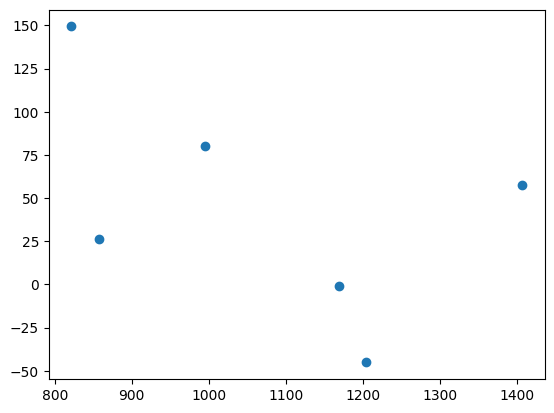

In [37]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [38]:
import statsmodels.api as sm
model= sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                       0.754
Time:                        12:54:31   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\hgp99\OneDrive\Desktop\AI-ML-DS\.venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
print(regression.coef_)

[  88.27275507 -116.25716066]
